In [2]:
import os
print("Current Directory:", os.getcwd())


Current Directory: D:\ESP32\IoT Health Monitor\ML


In [4]:
# 📓 Cell 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib



In [42]:
# 📓 Cell 2: Load your data
df = pd.read_csv("health_data.csv")
df.head()


,HeartRate,SpO2,Temperature,ECG,Label
0,98,97,36.7,510,Healthy
1,96,98,36.5,512,Healthy
2,92,99,36.6,509,Healthy
3,100,97,36.8,515,Healthy
4,95,98,36.7,511,Healthy


In [24]:
# 📓 Cell 3: Check for missing values
df.isnull().sum()


HeartRate      0
SpO2           0
Temperature    0
ECG            0
Label          0
dtype: int64

In [44]:
# ✅ Normalize and map labels
df['Label'] = df['Label'].astype(str).str.strip().str.title()

label_mapping = {'Healthy': 0, 'Fever': 1, 'Hypoxia': 2, 'Unwell': 3}
df['Label'] = df['Label'].map(label_mapping)

df.head()


,HeartRate,SpO2,Temperature,ECG,Label
0,98,97,36.7,510,0
1,96,98,36.5,512,0
2,92,99,36.6,509,0
3,100,97,36.8,515,0
4,95,98,36.7,511,0


In [46]:
df['ECG'] = pd.to_numeric(df['ECG'], errors='coerce')  # in case of string ECG
df.dropna(inplace=True) 

In [48]:
print(df['Label'].unique())        # should show: [0 1 2 3]
print(df['Label'].isna().sum())    # should show: 0


[0 1 2 3]
0


In [28]:
# ✅ Cell 5: Separate features and labels
X = df[['HeartRate', 'SpO2', 'Temperature', 'ECG']]
y = df['Label']  # Now this is numeric (0, 1, 2, 3)


In [30]:
print(X.dtypes)
print(y.unique())


HeartRate        int64
SpO2             int64
Temperature    float64
ECG              int64
dtype: object
[nan]


In [32]:
# Convert ECG to numeric, force invalid values to NaN
df['ECG'] = pd.to_numeric(df['ECG'], errors='coerce')
df.dropna(inplace=True)

In [34]:
print(df.dtypes)
print(df['Label'].unique())


HeartRate        int64
SpO2             int64
Temperature    float64
ECG              int64
Label          float64
dtype: object
[]


In [40]:
print(df['Label'].isna().sum())   # 🔍 Check for missing values
print(df['Label'].unique())       # 🔍 Show what values are present


0
[]


In [62]:
# 📓 Cell 6: Split into training and test data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split features and target
X = df[['HeartRate', 'SpO2', 'Temperature', 'ECG']]
y = df['Label'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [64]:
# 📓 Cell 7: Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [66]:
# 📓 Cell 8: Evaluate model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



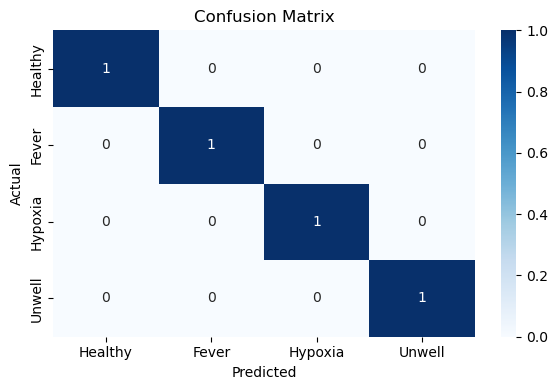

In [68]:
# 📓 Cell 9: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [70]:
# 📓 Cell 10: Save model
joblib.dump(clf, "health_rf_model.pkl")
print("Model saved as 'health_rf_model.pkl'")


Model saved as 'health_rf_model.pkl'


In [60]:
# 📓 Cell 11: (Optional) Test prediction with manual input
sample = [[100, 95, 36.7, 500]]  # HR, SpO2, Temp, ECG
predicted_class = clf.predict(sample)[0]
label_reverse = {v: k for k, v in label_mapping.items()}
print("Predicted Health Status:", label_reverse[predicted_class])


Predicted Health Status: Healthy


D:\Anaconda\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [72]:
import joblib
joblib.dump(clf, "health_model.pkl")


['health_model.pkl']